# Task to be done

Python/Data Visualization/Feature Engineering
 
1	Load csv file in notebook using python code 

2	Explore Data using python code

    •	Total records, Null count

    •	Mean, median, std-dev for each numerical column
 
1	Plot charts and explain them in words

2	Check if “BMI” column has null values? what is the percentage of null values ? use data engineering method to fill the null values.

3	Remove outliers from any two numerical columns using any appropriate ML technique

4	Perform Scaling on all numerical columns

5	Perform Encoding on all categorical columns

6	Generate at least 2 new features using existing features of your choice


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

### 1. Load csv file in notebook using python code

In [2]:
data = pd.read_csv('healthcare-dataset-stroke-data.csv')
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [3]:
data.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

### 2. Explore Data using python code

    • Total records

In [4]:
data.count()

id                   5110
gender               5110
age                  5110
hypertension         5110
heart_disease        5110
ever_married         5110
work_type            5110
Residence_type       5110
avg_glucose_level    5110
bmi                  4909
smoking_status       5110
stroke               5110
dtype: int64

    • Null count

In [5]:
data.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

    • Mean, median, std-dev for each numerical column

In [6]:
data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [7]:
print('Mean of numerical columns :')
print(data.mean())

Mean of numerical columns :
id                   36517.829354
age                     43.226614
hypertension             0.097456
heart_disease            0.054012
avg_glucose_level      106.147677
bmi                     28.893237
stroke                   0.048728
dtype: float64


In [8]:
print('Median of numerical columns :')
print(data.median())

Median of numerical columns :
id                   36932.000
age                     45.000
hypertension             0.000
heart_disease            0.000
avg_glucose_level       91.885
bmi                     28.100
stroke                   0.000
dtype: float64


In [9]:
print('Standard Deviation of numerical columns :')
print(data.std())

Standard Deviation of numerical columns :
id                   21161.721625
age                     22.612647
hypertension             0.296607
heart_disease            0.226063
avg_glucose_level       45.283560
bmi                      7.854067
stroke                   0.215320
dtype: float64


### 3. Plot charts and explain them in words

In [10]:
data.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

Value count for Work type : 
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64 



<AxesSubplot:xlabel='work_type', ylabel='count'>

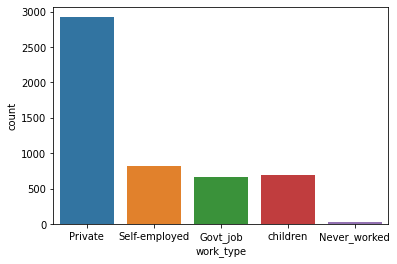

In [11]:
print('Value count for Work type : ')
print(data.work_type.value_counts(),'\n')
sns.countplot(data.work_type)

### Bi-variate Analysis

<AxesSubplot:xlabel='heart_disease', ylabel='count'>

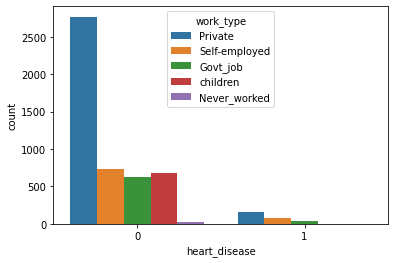

In [12]:
# In this, we can find the person who has heartattack based on the work-type. 
# We can identify that private employee tend to have more heart attack than other.

sns.countplot(x='heart_disease',hue='work_type' , data=data)

<AxesSubplot:xlabel='heart_disease', ylabel='count'>

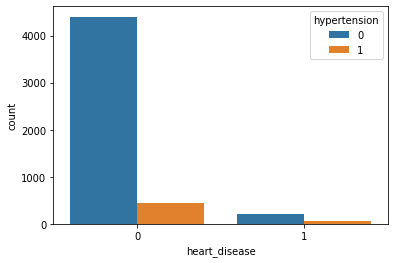

In [13]:
# In this, we can find the person who has heartattack based on the hypertension. 
# We can identify that private employee tend to have hypertension than other

sns.countplot(x='heart_disease',hue='hypertension' , data=data)

<AxesSubplot:>

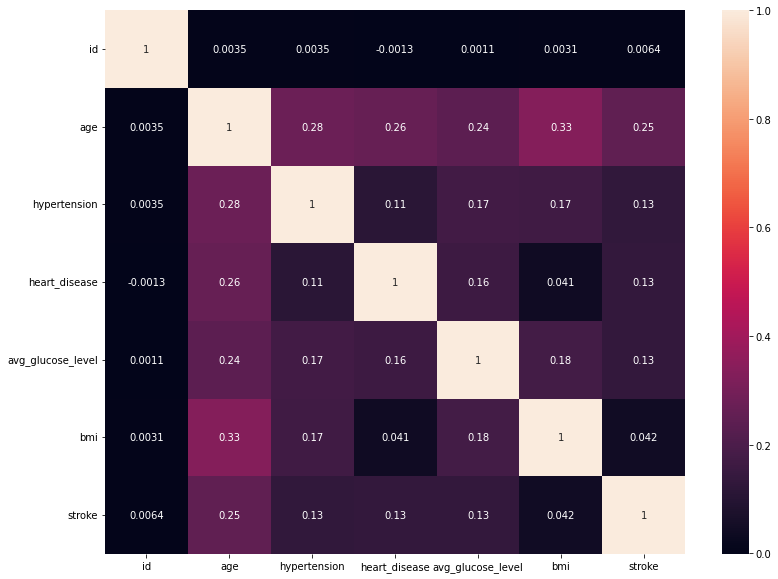

In [14]:
fig , ax = plt.subplots(figsize=(13,10))
sns.heatmap(data.corr() ,  annot=True)

### 4. Check if “BMI” column has null values? 

    what is the percentage of null values ? 
    
    use data engineering method to fill the null values.

In [15]:
print('There are', data.bmi.isnull().sum(), 'null values in bmi column')

There are 201 null values in bmi column


In [16]:
import math

total_values = data.bmi.count()
null_values = data.bmi.isnull().sum()
print('There are {:.2f} % values are null in bmi column'.format(null_values/total_values*100))

There are 4.09 % values are null in bmi column


In [17]:
data.bmi.dtypes

dtype('float64')

28.893236911794666
28.1


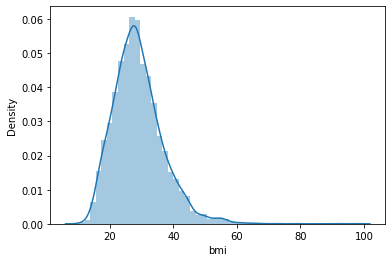

In [18]:
# Plotting bmi chart
sns.distplot(data.bmi)

print(data.bmi.mean())
print(data.bmi.median())

In [19]:
# The bmi value is continous and skewed, we can use median to fill the null values

# In skewed data, the mean is biased by the values at the far end of the distribution. So it is better to use median.

print('The Median value for bmi column is - ', data.bmi.median())
data["bmi"].fillna(data.bmi.median(), inplace = True)
data.head()

The Median value for bmi column is -  28.1


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


### 5. Remove outliers from any two numerical columns using any appropriate ML technique

### 6. Perform Scaling on all numerical columns

In [20]:
# age, hypertension, heart_disease, avg_glucose_level, bmi, stroke are the numerical columns.
from sklearn.preprocessing import StandardScaler

colList = ['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'stroke']

scaler = StandardScaler()

scaledData = data[['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'stroke']]
scaledData = pd.DataFrame(scaler.fit_transform(scaledData), columns=colList)
print(scaledData)

           age  hypertension  heart_disease  avg_glucose_level       bmi  \
0     1.051434     -0.328602       4.185032           2.706375  1.005086   
1     0.786070     -0.328602      -0.238947           2.121559 -0.098981   
2     1.626390     -0.328602       4.185032          -0.005028  0.472536   
3     0.255342     -0.328602      -0.238947           1.437358  0.719327   
4     1.582163      3.043196      -0.238947           1.501184 -0.631531   
...        ...           ...            ...                ...       ...   
5105  1.626390      3.043196      -0.238947          -0.494658 -0.098981   
5106  1.670617     -0.328602      -0.238947           0.420775  1.446713   
5107 -0.363842     -0.328602      -0.238947          -0.511443  0.225745   
5108  0.343796     -0.328602      -0.238947           1.328257 -0.423706   
5109  0.034205     -0.328602      -0.238947          -0.460867 -0.345772   

        stroke  
0     4.418381  
1     4.418381  
2     4.418381  
3     4.418381  
4 

In [21]:
# now add the scaled data into actual data
data['age'] = scaledData['age'] 
data['hypertension'] = scaledData['hypertension']
data['heart_disease'] = scaledData['heart_disease']
data['avg_glucose_level'] = scaledData['avg_glucose_level']
data['bmi'] = scaledData['bmi']
data['stroke'] = scaledData['stroke']

In [22]:
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,1.051434,-0.328602,4.185032,Yes,Private,Urban,2.706375,1.005086,formerly smoked,4.418381
1,51676,Female,0.786070,-0.328602,-0.238947,Yes,Self-employed,Rural,2.121559,-0.098981,never smoked,4.418381
2,31112,Male,1.626390,-0.328602,4.185032,Yes,Private,Rural,-0.005028,0.472536,never smoked,4.418381
3,60182,Female,0.255342,-0.328602,-0.238947,Yes,Private,Urban,1.437358,0.719327,smokes,4.418381
4,1665,Female,1.582163,3.043196,-0.238947,Yes,Self-employed,Rural,1.501184,-0.631531,never smoked,4.418381


### 7. Perform Encoding on all categorical columns

In [23]:
# Get the columns which has categorical values
category_data = data.select_dtypes(include=['object']).copy()
category_data.head()

,gender,ever_married,work_type,Residence_type,smoking_status
0,Male,Yes,Private,Urban,formerly smoked
1,Female,Yes,Self-employed,Rural,never smoked
2,Male,Yes,Private,Rural,never smoked
3,Female,Yes,Private,Urban,smokes
4,Female,Yes,Self-employed,Rural,never smoked


In [24]:
# Get the unique categories present in each of the column in data
print('Gender', data['gender'].unique())
print('Ever Married', data['ever_married'].unique())
print('Work Type', data['work_type'].unique())
print('Residence Type', data['Residence_type'].unique())
print('Smoking Status', data['smoking_status'].unique())

Gender ['Male' 'Female' 'Other']
Ever Married ['Yes' 'No']
Work Type ['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
Residence Type ['Urban' 'Rural']
Smoking Status ['formerly smoked' 'never smoked' 'smokes' 'Unknown']


In [25]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

# Encode all categorical columns
colList = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

for i in colList:
    encoder.fit(data[i])
    data[i] = encoder.transform(data[i])

data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,1.051434,-0.328602,4.185032,1,2,1,2.706375,1.005086,1,4.418381
1,51676,0,0.786070,-0.328602,-0.238947,1,3,0,2.121559,-0.098981,2,4.418381
2,31112,1,1.626390,-0.328602,4.185032,1,2,0,-0.005028,0.472536,2,4.418381
3,60182,0,0.255342,-0.328602,-0.238947,1,2,1,1.437358,0.719327,3,4.418381
4,1665,0,1.582163,3.043196,-0.238947,1,3,0,1.501184,-0.631531,2,4.418381


### 8. Generate at least 2 new features using existing features of your choice.